In [541]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys  # Agregado
from selenium.webdriver.support.ui import Select
from selenium.common.exceptions import WebDriverException 
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

from bs4 import BeautifulSoup
from datetime import date
import time
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt





In [542]:
# Ruta del controlador de Chrome 
ruta_controlador_chrome = 'C:/path/to/chromedriver.exe' 

# Configurar las opciones del navegador
chrome_options = webdriver.ChromeOptions()
chrome_options.binary_location = 'C:/Program Files (x86)/Google/Chrome/Application/chrome.exe'  

# Se establece la ruta del controlador a través de las opciones
chrome_options.add_argument(f'--driver-path={ruta_controlador_chrome}')

# Inicio el navegador  con las opciones configuradas
driver = webdriver.Chrome(options=chrome_options)

# Navego a la pagina

ubicacion = 'https://www.ebay.com.ar/'
driver.get(ubicacion)

wait = WebDriverWait(driver, 10)
articulo = wait.until(EC.presence_of_element_located((By.NAME, '_nkw')))

In [543]:
articulo.send_keys("guitarra electrica")

In [544]:

# Esperar a que el botón sea clicable
wait.until(EC.element_to_be_clickable((By.ID, "gh-btn")))

# Localizar el botón de búsqueda por su ID después de la espera
buscar_boton = driver.find_element(By.ID, "gh-btn")

# Hacer clic en el botón
buscar_boton.click()


In [579]:
# Importar las bibliotecas necesarias
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd

# Número total de elementos que deseas obtener
objetivo_elementos = 1800
# Iniciar bucle para navegar páginas
total_elementos = 0

# Lista para almacenar todos los datos
datos_elementos = []

for pagina in range(1, objetivo_elementos // 60 + 2):  # +2 para asegurarse de alcanzar el objetivo
    # Hacer clic en el botón "Ir a la página de búsqueda siguiente" solo si no hemos alcanzado o superado el objetivo
    if total_elementos >= objetivo_elementos:
        break

    url_pagina = f"{url_base}{pagina}"

    # Ir a la página
    driver.get(url_pagina)

    # Esperar a que los elementos carguen (puedes ajustar esto según tu página)
    WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.XPATH, '//ul[@class="srp-results srp-list clearfix"]/li'))
    )

    # Obtener y contar los nombres
    elementos = driver.find_elements(By.XPATH, '//ul[@class="srp-results srp-list clearfix"]/li//div[@class="s-item__info clearfix"]')
   
    # Iterar sobre los elementos y obtener nombre, precio y lugar
    for elemento in elementos:
        nombre = elemento.find_element(By.XPATH, './/span[@role="heading" and @aria-level="3"]').text
        precio = elemento.find_element(By.XPATH, './/div[@class="s-item__detail s-item__detail--primary"]/span[@class="s-item__price"]').text
        lugar = elemento.find_element(By.XPATH, './/div[@class="s-item__detail s-item__detail--primary"]/span[@class="s-item__location s-item__itemLocation"]').text
        total_elementos += 1
        # Quitar "de " de la columna "lugar"
        lugar = lugar.replace("de ", "")
        # Agregar los datos a la lista
        datos_elementos.append({
            'nombre': nombre,
            'precio': precio,
            'lugar': lugar
        })

# Crear un DataFrame con todos los datos recopilados
df = pd.DataFrame(datos_elementos)

# Imprimir el DataFrame
print(df)

# Imprimir el total de elementos
print("Total de elementos recogidos:", total_elementos)
df.to_csv('nombre_del_archivo.csv', index=False)

                                                 nombre  \
0     Hermosa Guitarra Eléctrica Personalizada Blanc...   
1     Guitarra eléctrica estándar de alta calidad di...   
2     Regalo de Navidad Nueva Guitarra Eléctrica Fir...   
3     Guitarra eléctrica de la marca Groove TM S/S e...   
4     ANUNCIO NUEVOGuitarra eléctrica negra piano Fi...   
...                                                 ...   
1795  Guitarra Eléctrica Verde con Chapa de Arce Lla...   
1796  Guitarra Eléctrica Árbiter Japón Center años 7...   
1797  Guitarra eléctrica sin cabeza de alta calidad,...   
1798  Guitarra Eléctrica Vestido Azul Guitarra Cuell...   
1799  Totalmente Nueva Guitarra Eléctrica Verde Pers...   

                     precio           lugar  
0                 USD293.55           China  
1                 USD274.55           China  
2                 USD169.00  Estados Unidos  
3     USD139.50 a USD229.50          Canadá  
4                  USD30.00  Estados Unidos  
...            

In [546]:

import matplotlib.pyplot as plt
df = pd.DataFrame(datos_elementos)

# Filtrar el DataFrame según la columna "lugar"
df_por_pais = df.groupby('lugar').size().reset_index(name='conteo')

# Imprimir el DataFrame filtrado
print(df_por_pais)

                    lugar  conteo
0                Alemania       8
1               Australia      34
2                  Canadá      16
3                   China    1617
4  Emiratos Árabes Unidos       1
5          Estados Unidos      62
6                   Japón      55
7                 Malasia       1
8             Reino Unido       3
9                 Ucrania       3


                    lugar  conteo  porcentaje
0                Alemania       8    0.444444
1               Australia      34    1.888889
2                  Canadá      16    0.888889
3                   China    1617   89.833333
4  Emiratos Árabes Unidos       1    0.055556
5          Estados Unidos      62    3.444444
6                   Japón      55    3.055556
7                 Malasia       1    0.055556
8             Reino Unido       3    0.166667
9                 Ucrania       3    0.166667


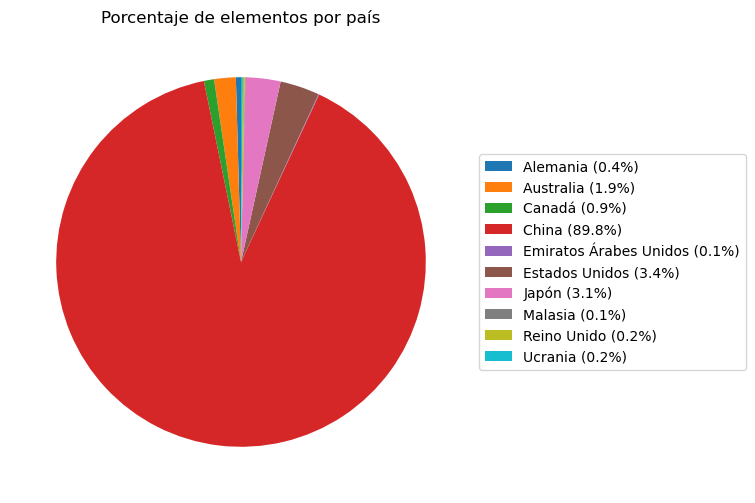

In [547]:
df_por_pais['porcentaje'] = (df_por_pais['conteo'] / df_por_pais['conteo'].sum()) * 100

print(df_por_pais)

# Graficar el gráfico de torta sin números
plt.figure(figsize=(10, 6))
plt.pie(df_por_pais['porcentaje'], startangle=90)
plt.title('Porcentaje de elementos por país')

# Crear leyenda con nombres y porcentajes
leyenda = [f"{pais} ({porcentaje:.1f}%)" for pais, porcentaje in zip(df_por_pais['lugar'], df_por_pais['porcentaje'])]

# Agregar leyenda fuera del gráfico
plt.legend(leyenda, loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

                    lugar      precio
0                Alemania  253.348750
1               Australia  170.042059
2                  Canadá  213.405625
3                   China  301.083148
4  Emiratos Árabes Unidos  507.200000
5          Estados Unidos  177.335000
6                   Japón  554.808909
7                 Malasia  309.470000
8             Reino Unido  359.266667
9                 Ucrania  109.990000


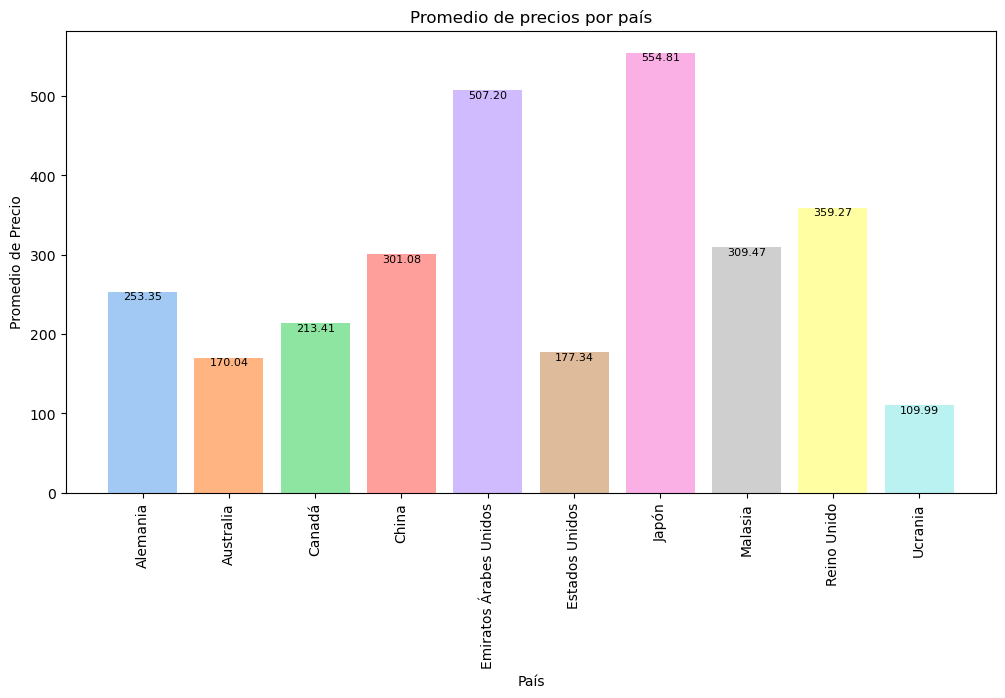

In [548]:
import seaborn as sns  # Importar seaborn

# Crear un DataFrame con todos los datos recopilados
df = pd.DataFrame(datos_elementos)

# Limpiar y convertir la columna "precio" a formato numérico
df['precio'] = df['precio'].str.extract(r'(\d+\.\d+)').astype(float)

# Filtrar el DataFrame según la columna "lugar"
df_por_pais = df.groupby('lugar').agg({'precio': 'mean'}).reset_index()

# Imprimir el DataFrame con los promedios de precios por país
print(df_por_pais)

# Graficar el gráfico de barras
plt.figure(figsize=(12, 6))
bar_colors = sns.color_palette("pastel", len(df_por_pais['lugar']))  # Colores pastel de seaborn

bars = plt.bar(df_por_pais['lugar'], df_por_pais['precio'], color=bar_colors)
plt.xlabel('País')
plt.ylabel('Promedio de Precio')
plt.title('Promedio de precios por país')

# Personalizar la apariencia de las barras
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height:.2f}',  # Mostrar el valor en la parte superior de cada barra
        ha='center',
        va='bottom' if height < 0 else 'top',  # Alinear el texto según la dirección de la barra
        fontsize=8,
    )

idx_max_df = df.groupby('lugar')['precio'].idxmax()
idx_min_df = df.groupby('lugar')['precio'].idxmin()

plt.xticks(rotation=90)  # Rotar los nombres en el eje x
plt.show()

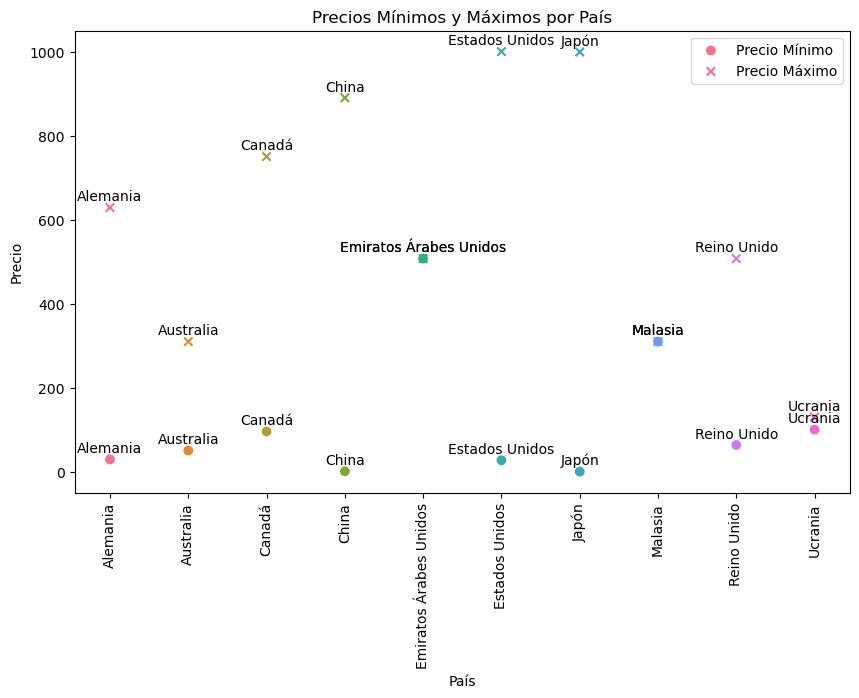

In [549]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asumo que df es tu DataFrame original

# Calcular precios mínimos y máximos por país
precio_min = df.groupby('lugar')['precio'].min().reset_index()
precio_min.columns = ['lugar', 'precio_min']

precio_max = df.groupby('lugar')['precio'].max().reset_index()
precio_max.columns = ['lugar', 'precio_max']

# Combinar datos en un solo DataFrame
df_max_min = pd.merge(precio_min, precio_max, on='lugar')

# Graficar el gráfico de dispersión
plt.figure(figsize=(10, 6))
scatter_colors = sns.color_palette("husl", len(df_max_min['lugar']))

# Puntos para precios mínimos
plt.scatter(df_max_min['lugar'], df_max_min['precio_min'], c=scatter_colors, label='Precio Mínimo')

# Puntos para precios máximos
plt.scatter(df_max_min['lugar'], df_max_min['precio_max'], c=scatter_colors, marker='x', label='Precio Máximo')

plt.xlabel('País')
plt.ylabel('Precio')
plt.title('Precios Mínimos y Máximos por País')
plt.xticks(rotation=90)
plt.legend()

# Etiquetar los puntos con el nombre del país
for i, (idx, row) in enumerate(df_max_min.iterrows()):
    plt.annotate(row['lugar'], (idx, row['precio_min']), textcoords="offset points", xytext=(0,5), ha='center')
    plt.annotate(row['lugar'], (idx, row['precio_max']), textcoords="offset points", xytext=(0,5), ha='center')

plt.show()


                     lugar   precio_min precio_max
0                 Alemania  USD1 627.83  USD922.39
1                Australia    USD110.22   USD98.11
2                   Canadá    USD124.50  USD249.50
3                    China      USD1.25  USD890.00
4   Emiratos Árabes Unidos    USD507.20  USD507.20
5           Estados Unidos  USD1 699.99   USD90.99
6                Hong Kong    USD369.90  USD369.90
7                    Japón  USD1 000.00  USD997.00
8                  Malasia    USD309.47  USD309.47
9              Reino Unido    USD158.50  USD507.20
10                 Ucrania    USD129.99   USD99.99


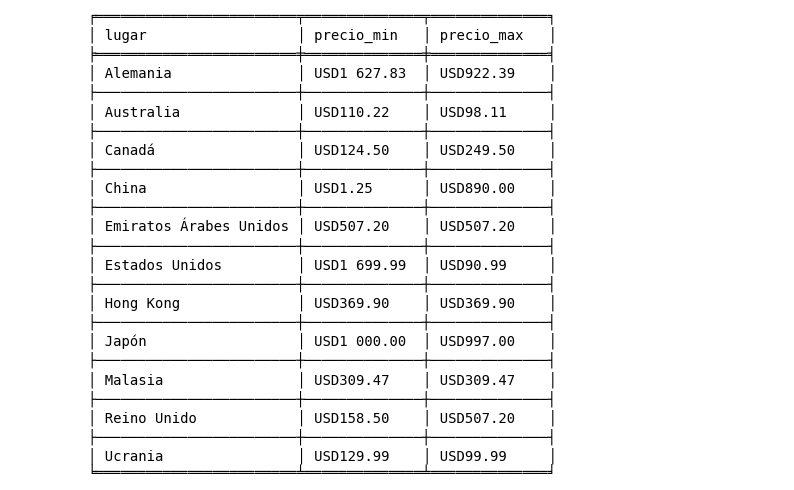

In [585]:
from tabulate import tabulate

# Calcular precios mínimos y máximos por país
precio_min = df.groupby('lugar')['precio'].min().reset_index()
precio_min.columns = ['lugar', 'precio_min']

precio_max = df.groupby('lugar')['precio'].max().reset_index()
precio_max.columns = ['lugar', 'precio_max']

# Combinar datos en un solo DataFrame
df_max_min = pd.merge(precio_min, precio_max, on='lugar')
)

# Imprimir el DataFrame resultante
print(df_max_min)
table_str = tabulate(df_max_min, headers='keys', tablefmt='fancy_grid', showindex=False)

# Crear una figura y ejes de matplotlib
fig, ax = plt.subplots(figsize=(10, 3))
ax.axis('off')  # Desactivar ejes para el cuadro

# Añadir el cuadro de texto a la figura
ax.text(0.1, 0.5, table_str, fontsize=10, va='center', family='monospace')

# Guardar la figura como imagen
plt.savefig('df_max_min.png', bbox_inches='tight', dpi=300)
plt.show()

In [586]:
df.to_csv('analisis_ebay.csv', index=False)
